In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import datetime
from datetime import timedelta
os.chdir('/project2/graziul/LoP/corpus/worklogs/')

In [2]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-09-15'

In [3]:
# Get files
files = glob.glob('*sessionlog.*')
list_of_dfs = [pd.read_csv(i) for i in files]
df = pd.concat(list_of_dfs).reset_index(drop=True)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['week_num'] = df['datetime'].apply(lambda x: (x + timedelta(days=1)).week)
# Remove problematic cases;:
# Issue with Saba Johnson only have Logoff for 2021-02-10
df = df[~((df['User']=='sabajohnson') & (df['Date']=='2021-02-10'))]
# Discount today
df = df[~(df['Date']==today)]
# Remove Chris and transcribers that have left (ezazycki, navila, cmathur24)
df = df[~(df['User'].isin(['graziul','ezazycki','navila','cmathur24']))]

In [4]:
df = df.sort_values(['User','datetime','week_num'])
# Assign session numbers 
df['session'] = df.groupby(['User','Action']).cumcount()+1
# Set date of session to Logon date
df_logon_date = df.groupby(['User','session'])['Date'].min().reset_index()
df = df[['User','datetime','week_num','session','Action']].merge(df_logon_date, on=['User','session'])

In [5]:
df1 = df.pivot_table(index=['User','Date','week_num','session'],columns=['Action'], values='datetime', aggfunc='min').reset_index()
df1['session_time'] = df1['Logoff']-df1['Logon']
df1['session_hours'] = df1['session_time'].dt.seconds/3600

In [6]:
# Tag veteran transcribers
df1['status'] = 'New'
df1.loc[df1['User'].isin(['aekim22','mhayford','mirandagw']),'status'] = 'Veteran'

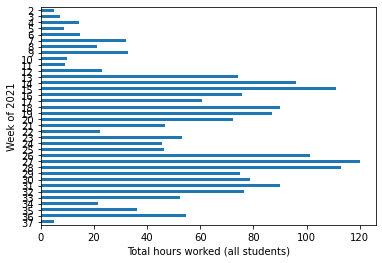

In [7]:
ax = df1.groupby(['week_num'])['session_hours'].sum().plot.barh()
ax.set_ylabel('Week of 2021')
ax.set_xlabel('Total hours worked (all students)')
ax.invert_yaxis()

In [8]:
fig = ax.get_figure()
fig.savefig('/project2/mbspencer/nih/transcripts/totalhours.png')

In [9]:
df2 = df1[(df1['week_num']>1)]# & (df1['week_num']<df1['week_num'].max())]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f749cdf6810>,
      dtype=object)

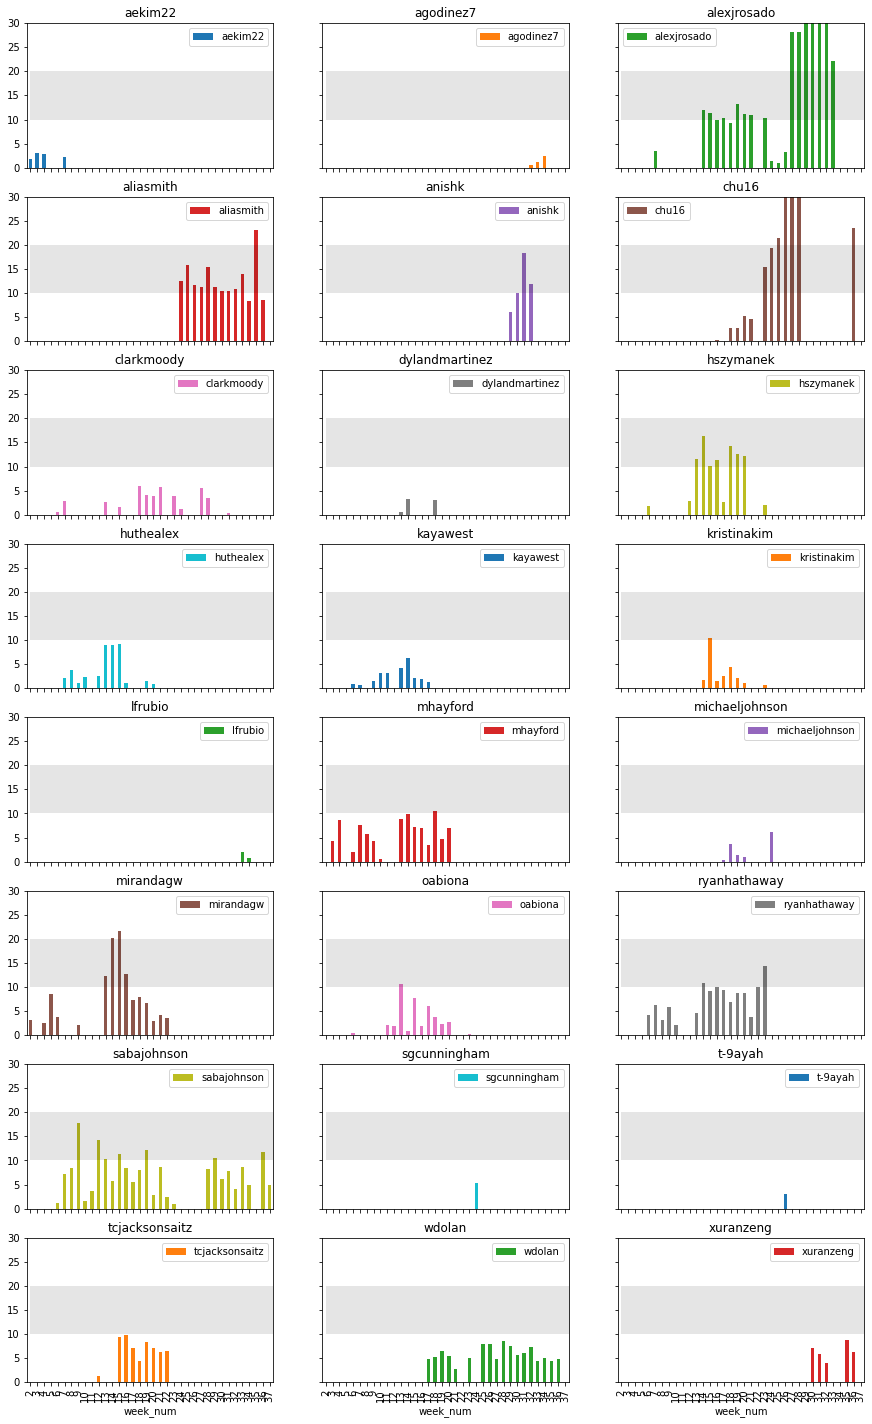

In [10]:
df_activity = df2.groupby(['User','week_num'])['session_hours'].agg('sum').unstack(0)
ax = df_activity.plot(kind='bar',
                      subplots=True, 
                      layout=(8,3), 
                      sharey=True, sharex=True,
                      figsize=(15,25),
                      ylim=(0,30))
for x in ax:
    for y in x:
        #y.axhline(y=20)
        #y.axhline(y=10)
        y.add_patch(Rectangle((0,10),df1['week_num'].max(),10, facecolor="black", alpha=0.1))
ax

In [11]:
ax[0][0].figure.savefig('/project2/mbspencer/nih/transcripts/userhours.png')

In [12]:
activity_tab = df2.groupby(['User','week_num'])['session_hours'].agg('sum').unstack(0).apply(lambda x: round(x,1)).fillna(0).T
activity_tab

week_num,2,3,4,5,6,7,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
User,,,,,,,,,,,,,,,,,,,,,
aekim22,1.8,3.1,2.9,0.0,0.0,2.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
agodinez7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.6,1.2,2.4,0.0,0.0,0.0
alexjrosado,0.0,0.0,0.0,0.0,0.0,3.4,0.0,0.0,0.0,0.0,...,28.2,39.6,39.2,41.4,37.8,22.2,0.0,0.0,0.0,0.0
aliasmith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.3,11.2,10.5,10.3,10.8,13.9,8.2,23.1,8.5,0.0
anishk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,10.1,18.2,11.9,0.0,0.0,0.0,0.0,0.0
chu16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.5,0.0
clarkmoody,0.0,0.0,0.0,0.0,0.6,2.8,0.0,0.0,0.0,0.0,...,3.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
dylandmartinez,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hszymanek,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
activity_tab[activity_tab.index!='aekim22'].describe()

week_num,2,3,4,5,6,7,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.134783,0.182609,0.491304,0.369565,0.647826,1.304348,0.917391,1.417391,0.417391,0.395652,...,4.913043,3.256522,3.421739,3.913043,3.317391,2.282609,0.930435,1.573913,2.378261,0.213043
std,0.646395,0.875761,1.869592,1.772373,1.191969,2.463456,2.234370,3.881149,0.912864,1.069613,...,11.772862,8.669949,8.527280,9.374981,8.307097,5.506661,2.171391,5.101534,5.611592,1.021721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.750000,1.400000,0.000000,0.550000,0.000000,0.000000,...,1.700000,0.000000,2.850000,3.050000,2.300000,0.600000,0.000000,0.000000,0.000000,0.000000
max,3.100000,4.200000,8.700000,8.500000,4.100000,7.600000,8.500000,17.800000,3.200000,3.700000,...,49.200000,39.600000,39.200000,41.400000,37.800000,22.200000,8.200000,23.100000,23.500000,4.900000


In [14]:
df_week_hours = df2.groupby(['User','week_num'])['session_hours'].agg('sum').reset_index(drop=False)
df_week_hours.to_csv('/project2/mbspencer/nih/transcripts/weekly_hours.csv',index=False)
df_week_hours.head()

,User,week_num,session_hours
0,aekim22,2,1.850000
1,aekim22,3,3.100000
2,aekim22,4,2.916667
3,aekim22,7,2.133333
4,agodinez7,32,0.650000


In [15]:
df1.groupby('User')['session_hours'].sum()

User
aekim22            10.000000
agodinez7           4.216667
alexjrosado       344.166667
aliasmith         162.983333
anishk             46.166667
chu16             290.583333
clarkmoody         41.366667
dylandmartinez      6.883333
hszymanek          97.400000
huthealex          42.150000
kayawest           25.283333
kristinakim        24.166667
lfrubio             2.866667
mhayford           91.816667
michaeljohnson     12.250000
mirandagw         119.216667
oabiona            40.750000
ryanhathaway      117.800000
sabajohnson       197.750000
sgcunningham        5.400000
t-9ayah             3.033333
tcjacksonsaitz     59.983333
wdolan            103.966667
xuranzeng          32.050000
Name: session_hours, dtype: float64

In [16]:
# Total all hours worked
df1['session_hours'].sum()

1882.25

In [17]:
df1.groupby('status')['session_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
New,839.0,1.979996,2.157057,0.016667,0.916667,1.466667,2.316667,22.85
Veteran,158.0,1.398945,0.745239,0.250000,0.883333,1.225000,1.875000,3.40
